# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time as t

# Import API key
api_key = '17d0c513c342df6edd66c3c2eea4796e'


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [137]:
counter = 0
setcounter = 0
responsename = []
responsedate = []
responsecnt = []
responsetemp = []
responsehum = []
responsecloud = []
responsewind = []
responselat = []
responselon = []
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city + '&units=imperial'  
    response = requests.get(query_url).json()
    
    try:
        name = response['name']
    except:
        print(f"City not found, testing next.")
    try:
        date = response['main']['temp_max']
    except:
        next
    try:
        cnt = response['sys']['country']
    except:
        next
    try:
        time = response['dt']
    except:
        next
    try:
        hum = response['main']['humidity']
    except:
        next
    try:
        cloud = response['clouds']['all']
    except:
        next
    try: 
        temp = response['main']['temp_max']
    except:
        next
    try:
        wind = response['wind']['speed']
    except:
        next
    try:
        lat = response['coord']['lat']
    except:
        next
    try:
        lon = response['coord']['lon']
    except:
        next
    responselon.append(lon)        
    responselat.append(lat)
    responsewind.append(wind)
    responsename.append(name)
    responsetemp.append(temp)
    responsecnt.append(cnt)
    responsedate.append(time)
    responsehum.append(hum)
    responsecloud.append(cloud)
    
    counter = counter + 1
    
    if counter == 50:
        t.sleep(10)
        
    
        
        
    print(f"Processing city number:{counter}  City name:{city}")

Processing city number:1  City name:trincomalee
Processing city number:2  City name:punta arenas
Processing city number:3  City name:hermanus
Processing city number:4  City name:vestmannaeyjar
Processing city number:5  City name:east london
Processing city number:6  City name:shizunai
Processing city number:7  City name:new norfolk
Processing city number:8  City name:mataura
Processing city number:9  City name:ponta do sol
Processing city number:10  City name:bredasdorp
Processing city number:11  City name:albany
Processing city number:12  City name:tubmanburg
Processing city number:13  City name:pevek
Processing city number:14  City name:atar
City not found, testing next.
Processing city number:15  City name:bargal
Processing city number:16  City name:hilo
Processing city number:17  City name:ushuaia
Processing city number:18  City name:busselton
Processing city number:19  City name:bluff
Processing city number:20  City name:cabo san lucas
Processing city number:21  City name:kaseda
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [138]:
citydata = []
citydata = zip(responsename, responsecloud, responsecnt, responsedate, responsehum, responselat, responselon, responsetemp, responsewind)

In [139]:
citydf = pd.DataFrame(citydata)

In [140]:
citydf = citydf.rename(index = str, columns = {0:"City", 1:'Cloud Cover',2:'Country',3:'Date',4:'Humidity',5:'Lat',6:'Lon', 7:'Temp',8:'Wind Speed'})

In [141]:
citydf.count()

City           633
Cloud Cover    633
Country        633
Date           633
Humidity       633
Lat            633
Lon            633
Temp           633
Wind Speed     633
dtype: int64

In [142]:
citydf.head()

,City,Cloud Cover,Country,Date,Humidity,Lat,Lon,Temp,Wind Speed
0,Trincomalee,93,LK,1562175569,73,8.58,81.23,80.36,8.95
1,Punta Arenas,40,CL,1562175569,80,-53.16,-70.91,33.80,9.17
2,Hermanus,0,ZA,1562175569,84,-34.42,19.24,57.99,1.01
3,Vestmannaeyjar,90,IS,1562175569,100,63.44,-20.27,51.80,11.41
4,East London,0,ZA,1562175570,82,-33.02,27.91,59.00,10.29


''

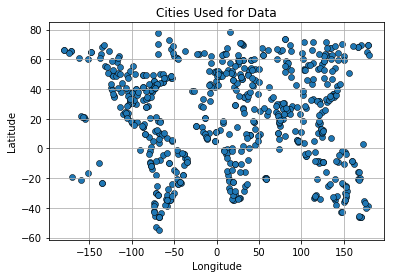

In [143]:
xlon = citydf['Lon']
ylat = citydf['Lat']
plt.scatter(xlon, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cities Used for Data')

;

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

''

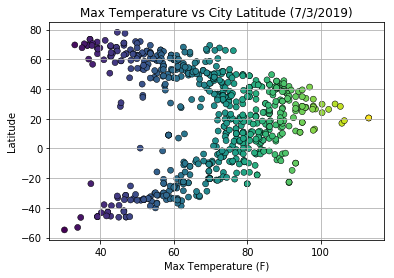

In [144]:
xtemp = citydf['Temp']
ylat = citydf['Lat']
plt.scatter(xtemp, ylat, c=xtemp, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.title('Max Temperature vs City Latitude (7/3/2019)')

;

#### Latitude vs. Humidity Plot

''

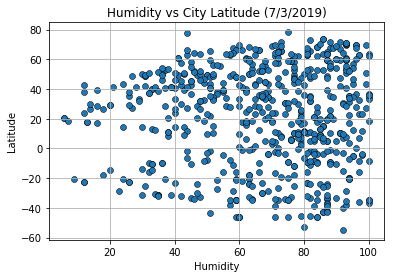

In [145]:
xhum = citydf['Humidity']
ylat = citydf['Lat']
plt.scatter(xhum, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Humidity vs City Latitude (7/3/2019)')

;

#### Latitude vs. Cloudiness Plot

''

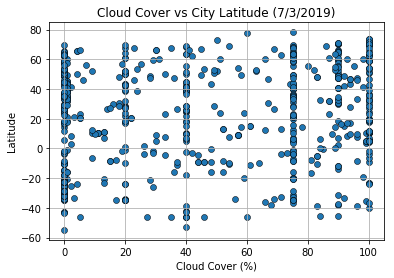

In [146]:
xcld = citydf['Cloud Cover']
ylat = citydf['Lat']
plt.scatter(xcld, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Latitude')
plt.title('Cloud Cover vs City Latitude (7/3/2019)')

;

#### Latitude vs. Wind Speed Plot

''

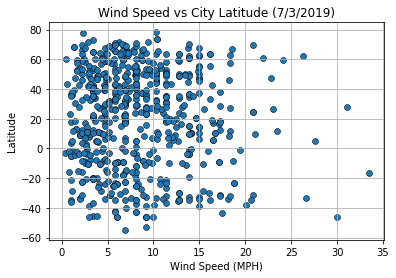

In [147]:
xwnd = citydf['Wind Speed']
ylat = citydf['Lat']
plt.scatter(xwnd, ylat, edgecolor = 'black', linewidth = .5)
plt.grid()
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.title('Wind Speed vs City Latitude (7/3/2019)')

;